# Predict the price of a product from characteristic features

#### The price prediciton is based on Artifitial Neuron Network (ANN) using TensorFlow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from temp_to_features import*

# **Load data**

In [2]:
## load data ##
df_dir=r'df_clean_raw.pkl'
df= pd.read_pickle(df_dir)

In [3]:
Train_col_list=['order quantity', 
                'Customer', 
                'By_way', 
               'Types',
                'SPEC_1st_L1',
                'SPEC_1st_L2', 
                'SPEC_1st_L3',
               'SPEC_1st_N',
                'SPEC_2nd_L1', 
               'SPEC_2nd_L2',
                'SPEC_2nd_L3',
                'Ap_outer_r',
                'Ap_L',
               'cen_outter_r',
                'cen_L',
                'cen_material',
                'Shell_outer_r', 
               'shell_L',
                'shell_material',
                'price per unit']

Display Data

In [4]:
## show load data
pd.set_option('display.max_columns', None)
df.reset_index(inplace=True,drop=True)
df=df[Train_col_list]
q=df['price per unit'].quantile(0.95)
df=df[df['price per unit']<q]
df.to_pickle('df_templet.pkl')
df

,order quantity,Customer,By_way,Types,SPEC_1st_L1,SPEC_1st_L2,SPEC_1st_L3,SPEC_1st_N,SPEC_2nd_L1,SPEC_2nd_L2,SPEC_2nd_L3,Ap_outer_r,Ap_L,cen_outter_r,cen_L,cen_material,Shell_outer_r,shell_L,shell_material,price per unit
0,1,新唐,SEMI,國內終端,X,X,S,20,W,M,R,105.0,136.0,29.0,136.0,SUS420,105.0,87.85,SUS304,53000.000
1,1,UMC 8C,SEMI,國內終端,X,X,S,625,A,M,N,76.2,204.0,44.0,204.0,SUS420,76.2,87.50,AL6061,49500.000
2,1,UMC 8C,SEMI,國內終端,X,X,S,625,A,M,N,76.2,204.0,44.0,204.0,SUS420,76.2,87.50,AL6061,49500.000
3,1,AMAT,DISPLAY,國內設備商,X,X,S,30,W,M,R,128.0,180.5,54.9,180.5,SUS420,128.0,121.00,SUS304,59015.000
4,1,UMC 8C,SEMI,國內終端,X,X,S,625,A,M,N,76.2,204.0,44.0,204.0,SUS420,76.2,87.50,AL6061,49500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1,AMAT,DISPLAY,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,80870.200
780,1,AMAT,DISPLAY,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,81705.615
781,1,AMAT,DISPLAY,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,80754.150
782,1,AMAT,DISPLAY,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,80754.150


Split Data into Numerical and Categorical Data

In [5]:
data,num,cat,dum=feature_col_clean_split(df)

C:\Users\James\.conda\envs\data\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
dum.columns

Index(['Customer_AMAT', 'Customer_AUOL6A', 'Customer_AUOL7A',
       'Customer_AUOL8A', 'Customer_D&E', 'Customer_HONJI', 'Customer_INX-8',
       'Customer_INX-T1', 'Customer_KJLC', 'Customer_PTW',
       ...
       'SPEC_2nd_L1_C', 'SPEC_2nd_L1_W', 'SPEC_2nd_L2_M', 'SPEC_2nd_L2_N',
       'SPEC_2nd_L3_H', 'SPEC_2nd_L3_N', 'SPEC_2nd_L3_R', 'SPEC_2nd_L3_U',
       'SPEC_2nd_L3_X', 'SPEC_2nd_L3_Z'],
      dtype='object', length=108)

# Set X and y

In [7]:
y=data['price per unit'].values
X=data.drop(['price per unit'],axis=1).values

# Train Test splitting 

In [8]:
from sklearn.model_selection import train_test_split
x0_train, X_test, y0_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val= train_test_split(x0_train, y0_train, test_size=0.2)
print(len(X_train), 'train dataset')
print(len(X_val), 'validation dataset')
print(len(X_test), 'test dataset')

476 train dataset
119 validation dataset
149 test dataset


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

## Save Scaler
import joblib
joblib.dump(scaler,'x_scaler.pkl')

['x_scaler.pkl']

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
X_train.shape

(476, 116)

In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model=Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(254,activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(X_train.shape[1],activation='relu'))

model.add((Dense(1)))
model.compile(optimizer='adam',loss='mse')

In [13]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=100)
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=512,
          epochs=2000,
          verbose=0,
          callbacks=[early_stop]
          )


Epoch 00223: early stopping


In [14]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

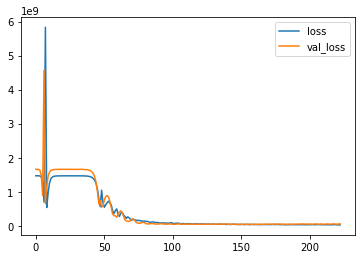

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
losses.plot()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 116)               13572     
_________________________________________________________________
dense_1 (Dense)              (None, 254)               29718     
_________________________________________________________________
dense_2 (Dense)              (None, 254)               64770     
_________________________________________________________________
dense_3 (Dense)              (None, 508)               129540    
_________________________________________________________________
dense_4 (Dense)              (None, 508)               258572    
_________________________________________________________________
dense_5 (Dense)              (None, 508)               258572    
_________________________________________________________________
dense_6 (Dense)              (None, 1016)              5

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [18]:
predictions=model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test,predictions))

9205.50413736883

In [20]:
mean_absolute_error(y_test,predictions)

5641.619310371225

In [21]:
df['price per unit'].describe()

count      744.000000
mean     30935.522560
std      22914.438357
min        680.960000
25%      10131.544125
50%      25210.125000
75%      49000.000000
max      92792.250000
Name: price per unit, dtype: float64

In [22]:
explained_variance_score(y_test,predictions)

0.8366093638334587

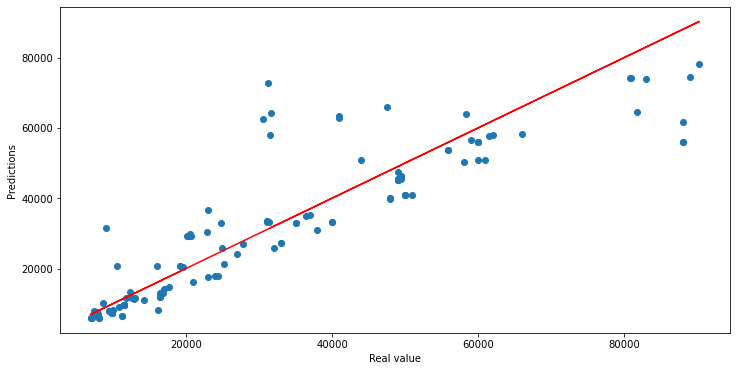

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Real value')
plt.ylabel('Predictions')
plt.show()

In [24]:
import numpy as np
i=np.random.randint(len(df), size=1)
single_feedthrough=data.drop('price per unit',axis=1).iloc[i]

In [25]:
single_feedthrough=scaler.transform(single_feedthrough.values.reshape(-1,X_train.shape[1]))

In [26]:
model.predict(single_feedthrough)

array([[25861.746]], dtype=float32)

In [27]:
df['price per unit'].iloc[i]

176    32000.0
Name: price per unit, dtype: float64

In [28]:
y_test.shape

(149,)

In [29]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

C:\Users\James\.conda\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


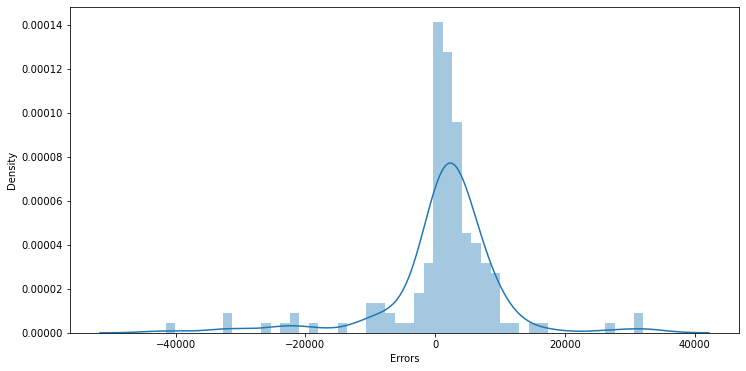

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

In [31]:
#model.save('model_noW_82.h5')